## xcube Data Store Framework - GeoTIFF and Cloud Optimized GeoTIFF (COG)

*Please checkout the general introduction to xcube data stores in the Jupyter Notebook [Getting Started](./1_getting_started.ipynb) before jumping into this notebook :)* 

This notebook explains how to open multi-resolution datasets (image pyramids) from a COG file using the `file` or `s3` data stores.

In [1]:
from xcube.core.new import new_cube
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store
from xcube.core.store import new_data_writer

### Getting prepared

Get a data store instance. We use the local filesystem here ("file"), you can also AWS S3 ("s3") if you have a writable bucket (= root).

In [2]:
data_store = new_data_store("file", root="../../../examples/serve/demo")  # Could also use "s3"

Get available data openers and writers. 
Data opener and writer identifiers use the format `{data_type}:{format_name}:{storage_type}`.

In [3]:
data_store.get_data_opener_ids()

('dataset:netcdf:file',
 'dataset:zarr:file',
 'dataset:levels:file',
 'mldataset:levels:file',
 'dataset:geotiff:file',
 'mldataset:geotiff:file',
 'geodataframe:shapefile:file',
 'geodataframe:geojson:file')

In [4]:
list(data_store.get_data_ids())

['cube.nc',
 'cube-1-250-250.levels',
 'cube-5-100-200.zarr',
 'example-geotiff.tif',
 'cog-example.tif',
 'cube-1-250-250.zarr']

In [4]:
data_store.describe_data('cog-example.tif')

### Open COG

In [5]:
ml_dataset = data_store.open_data("cog-example.tif")

In [6]:
ml_dataset.num_levels

7

Inspect the new multi-level dataset. Check spatial chunking or `tile_size`:

In [7]:
ml_dataset.grid_mapping

class: **Coords1DGridMapping**
* is_regular: True
* is_j_axis_up: False
* is_lon_360: _unknown_
* crs: PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]
* xy_res: (0.03732275, 0.03732275)
* xy_bbox: (-13334019, 4339158, -13333197, 4339531)
* ij_bbox: (0, 0, 22016, 9984)
* xy_dim_names: ('x', 'y')
* xy_var_names: ('x', 'y')
* size: (22016, 9984)
* tile_size: (512, 512)

In [8]:
for level in range(ml_dataset.num_levels):
    dataset_i = ml_dataset.get_dataset(level)
    display(dataset_i)

<xarray.Dataset>
Dimensions:      (x: 22016, y: 9984)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 11008, y: 4992)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 5504, y: 2496)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 2752, y: 1248)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 1376, y: 624)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 688, y: 312)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(312, 512), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(312, 512), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(312, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

<xarray.Dataset>
Dimensions:      (x: 344, y: 156)
Coordinates:
  * x            (x) float64 -1.333e+07 -1.333e+07 ... -1.333e+07 -1.333e+07
  * y            (y) float64 4.34e+06 4.34e+06 4.34e+06 ... 4.339e+06 4.339e+06
    spatial_ref  int64 0
Data variables:
    band_1       (y, x) uint8 dask.array<chunksize=(156, 344), meta=np.ndarray>
    band_2       (y, x) uint8 dask.array<chunksize=(156, 344), meta=np.ndarray>
    band_3       (y, x) uint8 dask.array<chunksize=(156, 344), meta=np.ndarray>
Attributes:
    source:   file:///home/tejas/bc/projects/xcube/examples/serve/demo/cog-ex...

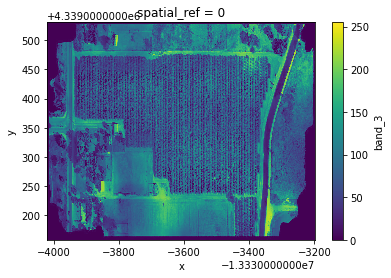

In [12]:
level = ml_dataset.get_dataset(4)
level.band_3.plot.imshow()